# Multi Armed Bandit Problem Using UCB Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import random; random.seed(90)

In [2]:
plt.style.use('ggplot')

## Import Datasets

In [3]:
datasets = pd.read_csv('./data/ads_clicks.csv')
datasets.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
ad1_rates = datasets['Ad 1'].sum() / len(datasets['Ad 1']); print(f'Click rates of Ad 1: {ad1_rates:.4f}')
ad2_rates = datasets['Ad 2'].sum() / len(datasets['Ad 2']); print(f'Click rates of Ad 2: {ad2_rates:.4f}')
ad3_rates = datasets['Ad 3'].sum() / len(datasets['Ad 3']); print(f'Click rates of Ad 3: {ad3_rates:.4f}')
ad4_rates = datasets['Ad 4'].sum() / len(datasets['Ad 4']); print(f'Click rates of Ad 4: {ad4_rates:.4f}')
ad5_rates = datasets['Ad 5'].sum() / len(datasets['Ad 5']); print(f'Click rates of Ad 5: {ad5_rates:.4f} (The Most Clicked One!)')
ad6_rates = datasets['Ad 6'].sum() / len(datasets['Ad 6']); print(f'Click rates of Ad 6: {ad6_rates:.4f}')
ad7_rates = datasets['Ad 7'].sum() / len(datasets['Ad 7']); print(f'Click rates of Ad 7: {ad7_rates:.4f}')
ad8_rates = datasets['Ad 8'].sum() / len(datasets['Ad 8']); print(f'Click rates of Ad 8: {ad8_rates:.4f}')
ad9_rates = datasets['Ad 9'].sum() / len(datasets['Ad 9']); print(f'Click rates of Ad 9: {ad9_rates:.4f}')
ad10_rates = datasets['Ad 10'].sum() / len(datasets['Ad 10']); print(f'Click rates of Ad 10: {ad10_rates:.4f}')

Click rates of Ad 1: 0.1703
Click rates of Ad 2: 0.1295
Click rates of Ad 3: 0.0728
Click rates of Ad 4: 0.1196
Click rates of Ad 5: 0.2695 (The Most Clicked One!)
Click rates of Ad 6: 0.0126
Click rates of Ad 7: 0.1112
Click rates of Ad 8: 0.2091
Click rates of Ad 9: 0.0952
Click rates of Ad 10: 0.0489


## Random Selection Method

In [5]:
N = len(datasets) # 10000
number_of_ads = len(datasets.columns) # 10
ads_selected = []
total_rewards = 0

In [6]:
random_rewards_history = []

for n in range(0, N):
    ad = random.randrange(number_of_ads)
    ads_selected.append(ad)
    reward = datasets.values[n, ad]
    total_rewards = total_rewards + reward
    random_rewards_history.append(total_rewards)

In [7]:
print(f'Total rewards achieved by {N} random selections: {total_rewards}')

Total rewards achieved by 10000 random selections: 1268


In [8]:
optimal_policy = pd.Series(ads_selected).value_counts(normalize=True).sort_values(ascending=False)
optimal_policy.index += 1 

print(f'The policy of the most displayed ad is: {optimal_policy.index[0], optimal_policy.index[1], optimal_policy.index[2]} (Wrong!)')

The policy of the most displayed ad is: (2, 6, 1) (Wrong!)


## Upper Confidence Bound Method

In [9]:
N = len(datasets) # 10000
number_of_ads = len(datasets.columns) # 10
ads_selected = []
numbers_of_selections = [0] * number_of_ads
sums_of_reward = [0] * number_of_ads
total_rewards = 0

In [10]:
ucb_rewards_history = []

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, number_of_ads):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            # apply UCB equation for calculating action-value (confidence)
            # this will ultimately lead to the optimal action being selected repeatedly in the end
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            # uncertainty threshold
            upper_bound = 1e400
        
        # if uncertainty is still high so it's important to explore the same arm/ action
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = datasets.values[n, ad]
    sums_of_reward[ad] += reward
    total_rewards = total_rewards + reward
    ucb_rewards_history.append(total_rewards)

In [12]:
print(f'Total rewards achieved by {N} UCB methods: {total_rewards} (much better cummulative rewards)')

Total rewards achieved by 10000 UCB methods: 2125 (much better cummulative rewards)


In [13]:
optimal_policy = pd.Series(ads_selected).value_counts(normalize=True).sort_values(ascending=False)
optimal_policy.index += 1 

print(f'The policy of the most displayed ads is: {optimal_policy.index[0], optimal_policy.index[1], optimal_policy.index[3]} (Correct!)')

The policy of the most displayed ads is: (5, 8, 7) (Correct!)


## Learning Evaluation

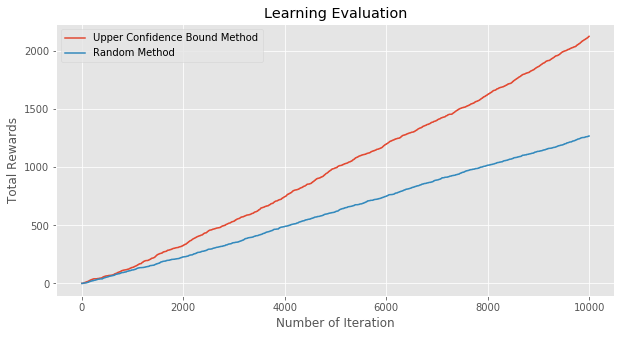

In [14]:
plt.figure(figsize=(10, 5))

plt.title('Learning Evaluation')
plt.xlabel('Number of Iteration')
plt.ylabel('Total Rewards')
plt.plot(ucb_rewards_history)
plt.plot(random_rewards_history)
plt.legend(['Upper Confidence Bound Method', 'Random Method'])
plt.show()

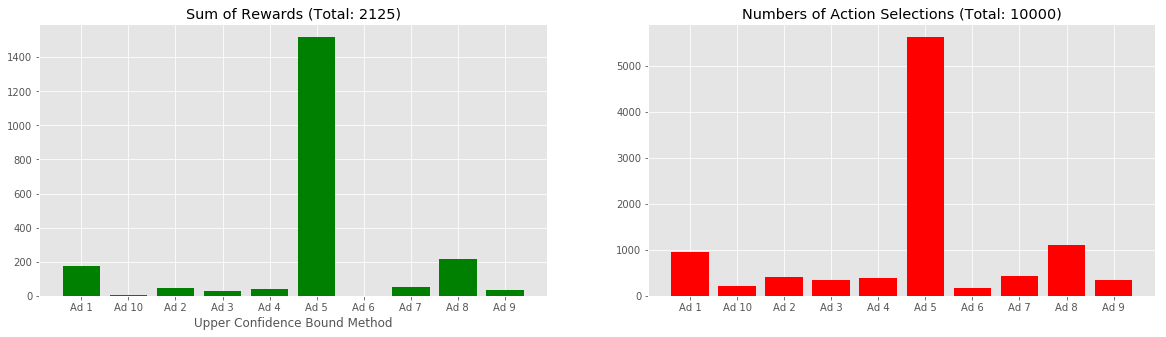

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
ads = ['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9', 'Ad 10']
plt.title(f'Sum of Rewards (Total: {total_rewards})')
plt.xlabel('Upper Confidence Bound Method')
plt.bar(ads, sums_of_reward, color='green')

plt.subplot(1, 2, 2)
ads = ['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9', 'Ad 10']
plt.title(f'Numbers of Action Selections (Total: {N})')
plt.bar(ads, numbers_of_selections, color='red')
plt.show()

---